# Thursday Group Challenge Analytics Oasis

## 1) The explanation

For this challenge, you and your group will be working with the UK subset of the *European Social Survey* from 2020 ("ESS10-subset.csv"). Your task is to engage in "bad" science practices to prove ridiculous ideas/hypotheses. For example, you could... 
- Wrongly remove extreme or biased outliers 
- Create misleading plots (zooming to omit certain variables) 
- Imply causation from correlation
- Relatedly, fail to account for a third variable that is influencing the relationship between two variables

**If you would like,** then you also may choose another dataset to perform bad science with. 

This Notebook walks you through some bad science practices so you can learn to identify them.

### This challenge is structured as follows: 

1. First 15 min. (e.g., 14:00-14:15): Go through the notebook with your group and **discuss the bad science example provide below** 

---

2. Next 45 min. (e.g., 14:15-15:00) **create a short "bad science" project** in this jupyter notebook. This involves:
    - Reviewing the variables, finding variables you are interested in 
    - Coming up with a testable hypothesis (this does not require any literature review) 
    - Cleaning the data (pay attention to the codebook here) 
    - Performing the bad science practices (at least 2 different ones, potentially more – let your creativity play!)
    - Prepare a Notebook to present to another group 
    
---

3. Next 15 min. (e.g., 15:45-16:00): pair up with another group, and **present the outcomes** of your bad science practices to each other (take about 3-5 minutes for each presentation)    

---

4. Next 30 min. (e.g., 16:00-16:30): Now **debunk the bad science practices of the other group**. Use statistical means (tables, figures, regression analysis) and conceptual means (literature on the empirical phenomenon, methodology, common sense). Prepare an online (Word) document to present your findings.

---

5. Next 30 min. (e.g., 16:30-17:00): Each group will **share their ideas how to debunk** the bad science practice of the other group. Share a **link on the Slack Year 1 Channel** to a document in which you demonstrate how you debunked bad science.

---

6. Come to me to pick up the Lego pieces for that day :)

### Importing required packages

In [1]:
# Group MickeyMouseClubHouse
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import zscore

### Load the data

To better understand the variables in the dataset, find the corresponding ESS10-subset codebook on Canvas: **Camp Group Work (Thursday, Feb 8).** 

In [2]:
# set df to show all columns 
pd.set_option("display.max_columns", None)

In [3]:
df = pd.read_csv('ESS10-subset-1.csv') # Add directory if needed
df.head()

,name,essround,edition,proddate,idno,cntry,dweight,pspwght,pweight,anweight,prob,stratum,psu,nwspol,netusoft,netustm,ppltrst,pplfair,pplhlp,polintr,psppsgva,actrolga,psppipla,cptppola,trstprl,trstlgl,trstplc,trstplt,trstprt,trstep,trstun,trstsci,vote,contplt,donprty,badge,sgnptit,pbldmna,bctprd,pstplonl,volunfp,clsprty,prtdgcl,lrscale,stflife,stfeco,stfgov,stfdem,stfedu,stfhlth,gincdif,freehms,hmsfmlsh,hmsacld,euftf,lrnobed,loylead,imsmetn,imdfetn,impcntr,imbgeco,imueclt,imwbcnt,happy,sclmeet,inprdsc,sclact,crmvct,aesfdrk,health,hlthhmp,atchctr,atcherp,rlgblg,rlgdnm,rlgblge,rlgdnme,rlgdgr,rlgatnd,pray,dscrgrp,dscrrce,dscrntn,dscrrlg,dscrlng,dscretn,dscrage,dscrgnd,dscrsex,dscrdsb,dscroth,dscrdk,dscrref,dscrnap,dscrna,ctzcntr,brncntr,cntbrthd,livecnta,lnghom1,lnghom2,feethngr,facntr,fbrncntc,mocntr,mbrncntc,ccnthum,ccrdprs,wrclmch,vteurmmb,vteubcmb,implvdm,gndr,yrbrn,edlvebe,edlvebg,edlvdch,edlvehr,edlvdcz,edlvdee,edlvdfi,edlvdfr,edlvegr,edlvdahu,edlvdis,edlvdie,edlveit,edlvdlt,edlvdme,edlvenl,edlveno,edlvdpt,edlvesi,edlvdsk,educgb1,edubgb2,edagegb,acchome,accwrk,accmove,accoth,accnone,accref,accdk,accna,fampref,famadvs,fampdf,mcclose,mcinter,mccoord,mcpriv,mcmsinf,chldo12,gndro12a,gndro12b,ageo12,hhlio12,closeo12,ttmino12,speako12,scrno12,phoneo12,como12,c19spo12,c19mco12,livpnt,pntmofa,agepnt,hhlipnt,closepnt,ttminpnt,speakpnt,scrnpnt,phonepnt,compnt,c19sppnt,c19mcpnt,stfmjob,trdawrk,jbprtfp,pfmfdjba,dcsfwrka,wrkhome,c19whome,c19wplch,wrklong,wrkresp,c19whacc,mansupp,manhlp,manwrkpl,manspeak,manscrn,manphone,mancom,teamfeel,wrkextra,colprop,colhlp,colspeak,colscrn,colphone,colcom,c19spwrk,c19mcwrk,mcwrkhom,inwds,inwde,inwtm,mode
0,ESS10e03_2,10,3.2,02.11.2023,50002,GB,0.560761,0.462199,4.79422,2.215882,0.000202,1463,10279,60,2,6666,7,7,8,4,2,3,2,1,2,7,7,2,2,4,4,9,1,2,2,2,2,2,2,2,2,1,2,5,8,2,2,2,2,1,4,2,4,2,7,2,4,2,2,2,7,7,7,8,3,3,3,2,2,3,2,7,5,2,66,2,66,0,7,7,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,6666,6666,ENG,000,1,1,6666,1,6666,3,7,3,NaN,NaN,9,1,1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,16,1,0,0,0,0,0,0,0,1,1,1,7,5,5,5,3,3,2,6,52,2,2,1,3,7,3,7,3,3,4,6,666,6,6,6666,66,66,66,66,66,6,66,6,66,6,6,66,66,6,66,66,66,66,6,66,66,66,66,66,66,66,66,6,66,66,66,66,66,66,66,2022-06-25 14:18:00,2022-06-25 14:58:00,26.0,1
1,ESS10e03_2,10,3.2,02.11.2023,50008,GB,1.121523,0.852171,4.79422,4.085496,0.000101,1428,10236,90,3,6666,8,8,7,2,3,1,3,1,6,6,5,7,7,5,5,8,1,2,2,2,2,2,2,2,2,1,2,9,8,6,7,8,6,6,4,2,4,3,5,2,4,3,3,3,3,3,3,9,4,4,3,2,2,1,3,10,3,2,66,1,2,4,5,7,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,6666,6666,ENG,000,1,1,6666,1,6666,3,10,5,NaN,NaN,10,2,1938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,20,1,0,0,0,0,0,0,0,1,1,1,3,3,0,5,0,2,1,6,54,2,2,1,3,7,3,6,1,1,4,6,666,6,6,6666,66,66,66,66,66,6,66,6,66,6,6,66,66,6,66,66,66,66,6,66,66,66,66,66,66,66,66,6,66,66,66,66,66,66,66,2021-09-13 15:03:00,2021-09-13 16:33:00,66.0,1
2,ESS10e03_2,10,3.2,02.11.2023,50021,GB,1.121523,0.828836,4.79422,3.973622,0.000101,1501,10327,60,1,6666,4,5,6,2,2,1,2,1,3,5,4,3,4,2,5,6,1,2,2,2,2,2,2,2,2,2,6,5,7,4,4,5,5,6,3,2,4,2,4,2,2,2,2,2,6,5,6,5,2,2,2,2,2,3,3,7,5,1,1,6,66,6,6,3,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,6666,6666,ENG,000,1,2,PL,1,6666,3,4,3,NaN,NaN,6,1,1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,11,15,0,0,0,0,1,0,0,0,1,1,1,6,7,6,7,6,1,6,2,52,2,2,0,2,7,2,7,3,3,4,6,666,6,6,6666,66,66,66,66,66,6,66,6,66,6,6,66,66,6,66,66,66,66,6,66,66,66,66,66,66,66,66,6,66,66,66,66,66,66,66,2022-08-17 13:02:00,2022-08-17 14:33:00,69.0,1
3,ESS10e03_2,10,3.2,02.11.2023,50023,GB,1.121523,1.821306,4.79422,8.731745,0.000101,1478,10300,60,5,180,4,7,4,2,3,2,3,2,3,4,6,2,4,6,5,7,2,2,2,2,1,2,1,1,1,1,2,2,8,5,4,6,7,4,2,1,5,1,7,3,4,1,1,1,9,10,10,8,6,3,3,1,3,2,3,4,7,2,66,1,1,3,5,6,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,PL,2005,POL,000,1,2,PL,2,PL,3,8,4,NaN,NaN,10,2,2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,11,96,1,0,0,0,0,0,0,0,5,5,4,4,8,8,7,9

## 2) Example variables that could be interesting: 
These variables might be nice starting points to explore the dataset. Make sure to check the codebook for the corresponding scale values (for example, which numbers represent "refusal" or "i don't know").
- gndr (gender; 1= Male; 2= Female; 9 = No answer)
- yrbrn (Year of birth)
- edubgb2 (Highest level of education) 
- netustm (internet use; how much on a typical day in minutes)
- pstplonl (did you post anything about politics in the past 12 months; 1 = yes; 2=no)
- mcclose (Online/mobile communication makes people feel closer to one another; 0= not at all; 10=completely)
- mcpriv (Online/mobile communication undermines personal privacy; 0= not at all; 10=completely)
- mcmsinf (Online/mobile communication exposes people to misinformation; 0 = not at all; 10 = completely)
- ppltrst (Most people can be trusted or you can't be too careful; 0 = you can't be too careful, 10 = Most people can be trusted)
- polintr (political interest;– 1 = very interested; 4= not at all interested)


## 3) A bad science example – implying causation from correlation: 

### Hypothesis formulation
First, come up with a hypothesis based on the variables that are available in the dataset:
### Hypothesis: *Endorsing respect for authority as the most important moral virtue causes the rejection of EU unification.*

### Create Variables & Clean the data:
Here, it is important to check the codebook of the survey to make sure you know what each value stands for, and to know which values should be removed (in cases where respondents chose "I don't know", for example).
- **euftf** (Support for EU unification)
    - 0 = EU unification has gone too far 
    - 10 = EU unification should go further
    - remove 77, 88, 99
- **lrnobed** ("Obedience and respect for authority most important virtues children should learn")
    - 1 = strongly agree 
    - 5 = strongly disagree 
    - remove 7, 8, 9

In [33]:
# Replace 77, 88 and 99 with "NA" so they don't get included in the analysis 
replace_with_na = [77, 88, 99]
df['euftf'].replace(replace_with_na, np.nan, inplace=True)

C:\Users\19241\AppData\Local\Temp\ipykernel_32304\3481442425.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['euftf'].replace(replace_with_na, np.nan, inplace=True)


In [34]:
# Replace 7, 8 and 9 with "NA" so they don't get included in the analysis 
replace_with_na = [7, 8, 9]
df['lrnobed'].replace(replace_with_na, np.nan, inplace=True)

C:\Users\19241\AppData\Local\Temp\ipykernel_32304\2277720484.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['lrnobed'].replace(replace_with_na, np.nan, inplace=True)


In [35]:
# Recode obedience and respect so for both variables, high variables indicate hgih agreement. 
# This is not necessary but it makes the interpretation of the effects easier.
# Reminder: .replace({old_value:new_value})
df['lrnobed_r'] = df['lrnobed'].replace({1:5, 2:4, 3:3, 4:2, 5:1})

### Show the effect - and present it as causal

In [36]:
# remove NA for the analysis and store as reduced dataframe
df_red = df[["euftf", "lrnobed_r"]].dropna()

In [37]:
# calculate pearson correlation
from scipy.stats import pearsonr
pearsonr(df_red['euftf'], df_red['lrnobed_r'])

PearsonRResult(statistic=-0.21682881648526725, pvalue=5.875790186940093e-13)

**This result shows a significant negative correlation in support of the hypothesis. It appears that obedience and respect for authority cause people to reject EU unification!**

### Visualize the effect:

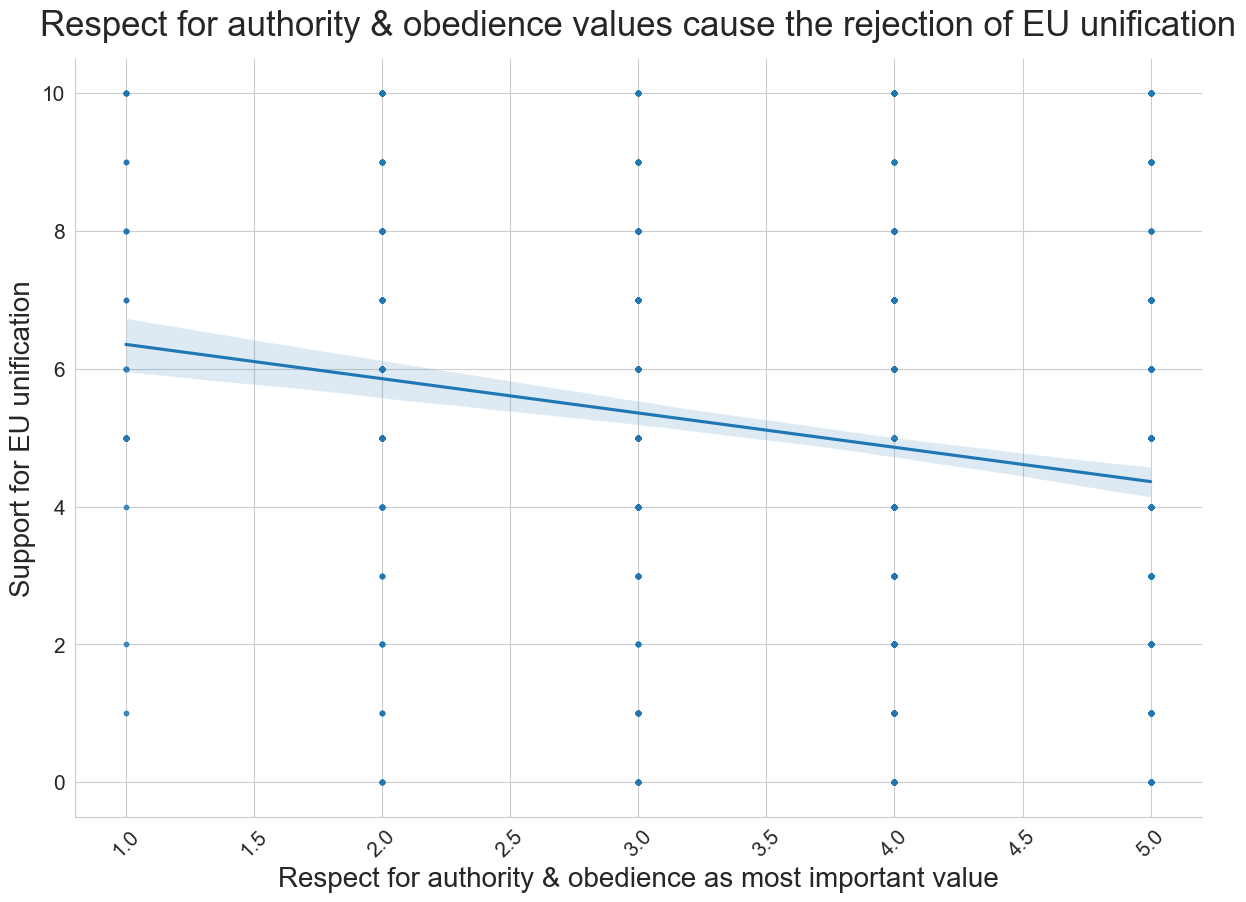

In [38]:
sns.set_style("whitegrid")
sns.lmplot(data=df_red, x="lrnobed_r", y="euftf", 
           height=8.27, aspect=12/8.27, 
          scatter_kws={"s": 10})
plt.title ("Respect for authority & obedience values cause the rejection of EU unification", fontsize=25, y=1.02)
plt.xlabel("Respect for authority & obedience as most important value", fontsize=20) 
plt.ylabel("Support for EU unification", fontsize=20)
plt.xticks(fontsize=15, rotation=45)  
plt.yticks(fontsize=15)
plt.show()

**Here, we could make the relationship look more extreme too by zooming in – another bad science practice.**

This can be achieved by modifying the limits of the y-axis (or the x-axis) to make the relationship appear stronger at first glance than it is

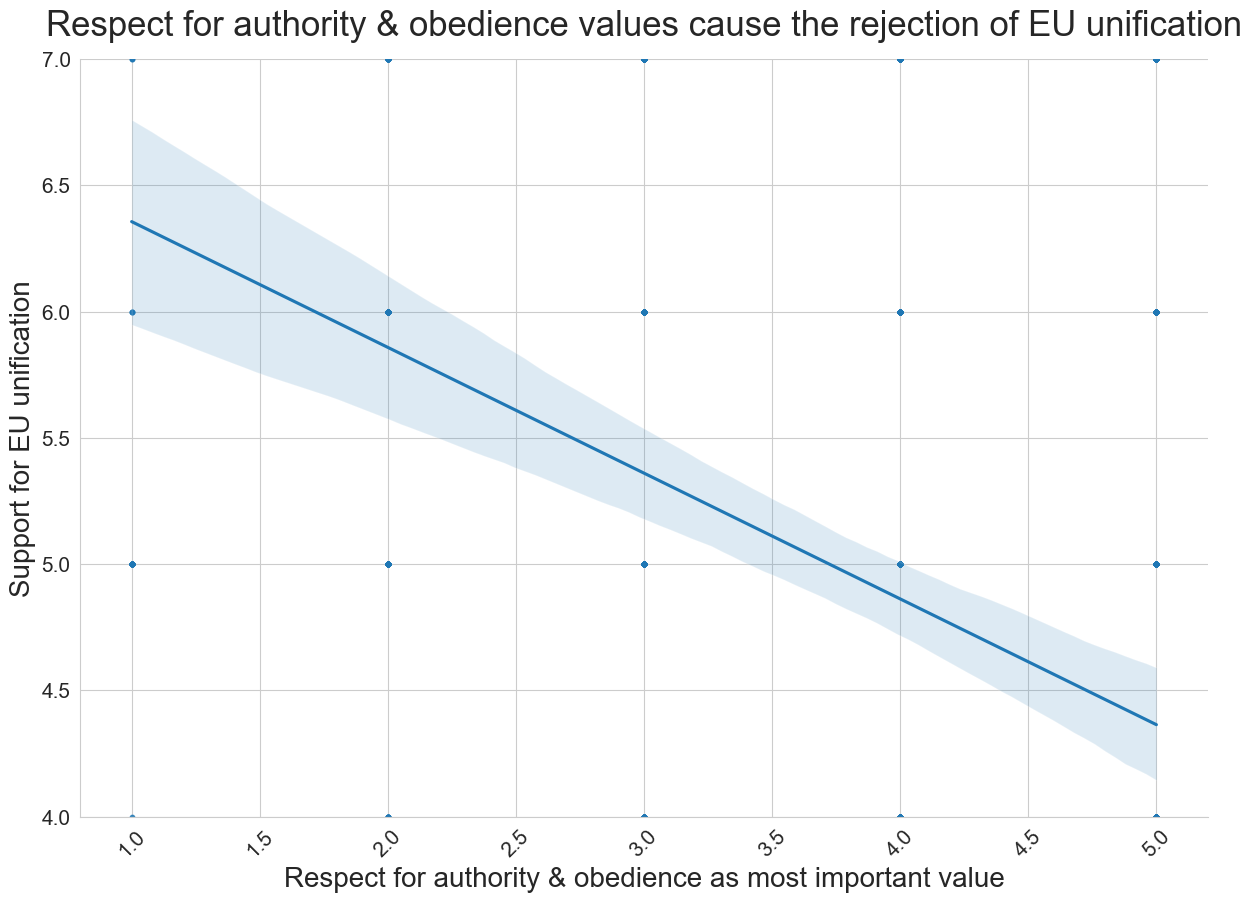

In [39]:
sns.set_style("whitegrid")
sns.lmplot(data=df_red, x="lrnobed_r", y="euftf", 
           height=8.27, aspect=12/8.27, 
          scatter_kws={"s": 10})
plt.title ("Respect for authority & obedience values cause the rejection of EU unification", fontsize=25, y=1.02)
plt.xlabel("Respect for authority & obedience as most important value", fontsize=20) 
plt.ylabel("Support for EU unification", fontsize=20)
plt.xticks(fontsize=15, rotation=45)  
plt.yticks(fontsize=15)
plt.ylim(4, 7) # adding limits for the y axis
plt.show()

## 4) Debunking bad science: is there a confounding variable? (using correlation matrix and theory)

Based on Moral Foundations Theory, which is widely applied in political psychology, individuals with different political orientations tend to emphasize distinct moral values (see Graham et al., 2013). Loyalty and Respect for authority are values which have been shown to be commonly endorsed by more right-leaning or conservative individuals. Therefore, it seems likely we have a third variable here: political orientation. If we look at the correlation matrix including that variable, we see both variables also correlate with political orrientation- which may be an indicator that a third variable underlies the relationship.

In [40]:
# prepare left-right scale variable: 
# 0 = left, 10=right 
replace_with_na = [77, 88, 99]
df['lrscale'].replace(replace_with_na, np.nan, inplace=True)

C:\Users\19241\AppData\Local\Temp\ipykernel_32304\978139869.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['lrscale'].replace(replace_with_na, np.nan, inplace=True)


In [41]:
# function to calculate a correlation matrix
from scipy.stats import pearsonr
import numpy as np
def corrmat(name_df): 
    rho = name_df.corr()
    pval = name_df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
    p = pval.applymap(lambda x: ''.join(['*' for t in [.05, .01, .001] if x<=t]))
    return rho.round(2).astype(str) + p

In [42]:
#select the variables of interest
correlation_matrix = df[["lrnobed_r", "euftf", "lrscale"]]

In [43]:
# apply corrmat function
corrmat(correlation_matrix)

C:\Users\19241\AppData\Local\Temp\ipykernel_32304\3309085354.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  p = pval.applymap(lambda x: ''.join(['*' for t in [.05, .01, .001] if x<=t]))


,lrnobed_r,euftf,lrscale
lrnobed_r,1.0***,-0.22***,0.28***
euftf,-0.22***,1.0***,-0.3***
lrscale,0.28***,-0.3***,1.0***


## 5) Debunking bad science: detecting moderating variables (using contingency table)

This may be a useful step in understanding how the responses for a specific variable (in this example, trust in science) are "moderated" by another variable, such as gender.

Not attending to moderation variabels may constitute a bad science practice when there are - possibly important - differences between groups that are overlooked. A good science practice would then be to perform a more fine-grained analysis.

In [44]:
# clean variables: 
# gender:
gndr_replace_na = [9]
df[''].replace(gndr_replace_na, np.nan, inplace=True)

# trust in science: 
replace_with_na = [7, 8, 9]
df[''].replace(replace_with_na, np.nan, inplace=True)

C:\Users\19241\AppData\Local\Temp\ipykernel_32304\3266468536.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gndr'].replace(gndr_replace_na, np.nan, inplace=True)
C:\Users\19241\AppData\Local\Temp\ipykernel_32304\3266468536.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [45]:
# create a contingency table:
# by adding normalize="index" and multiplying by 100, the table contains percentages instead of absolute numbers.
gender_trust_contingency_table = pd.crosstab(df['trstsci'], df['gndr'], normalize='columns')*100 # Also try: normalize='index'
gender_trust_contingency_table.round()

gndr,1,2
trstsci,,
0.0,2.0,1.0
1.0,0.0,1.0
2.0,2.0,2.0
3.0,2.0,3.0
4.0,4.0,3.0
5.0,8.0,10.0
6.0,8.0,9.0
7.0,14.0,19.0
8.0,28.0,25.0


## Now, it's time to create your own bad science example! 

In [46]:
# Formulate a hypothysis and analyse the data (or the other way around :-)
# And make sure you can nicely present your results to one of the other groups

In [47]:
replace_with_na = [5555, 7777, 8888, 9999]
df['edubgb2'].replace(replace_with_na, np.nan, inplace=True)

C:\Users\19241\AppData\Local\Temp\ipykernel_32304\4210273279.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['edubgb2'].replace(replace_with_na, np.nan, inplace=True)


In [48]:
replace_with_na = [7, 8, 9]
df['polintr'].replace(replace_with_na, np.nan, inplace=True)

C:\Users\19241\AppData\Local\Temp\ipykernel_32304\3354742628.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['polintr'].replace(replace_with_na, np.nan, inplace=True)


In [49]:
df_edugb_polintr = df[['edubgb2', 'polintr']].dropna()

In [50]:
pearsonr(df_edugb_polintr['edubgb2'], df_edugb_polintr['polintr'])

PearsonRResult(statistic=0.25249951702395546, pvalue=9.469313565336397e-18)

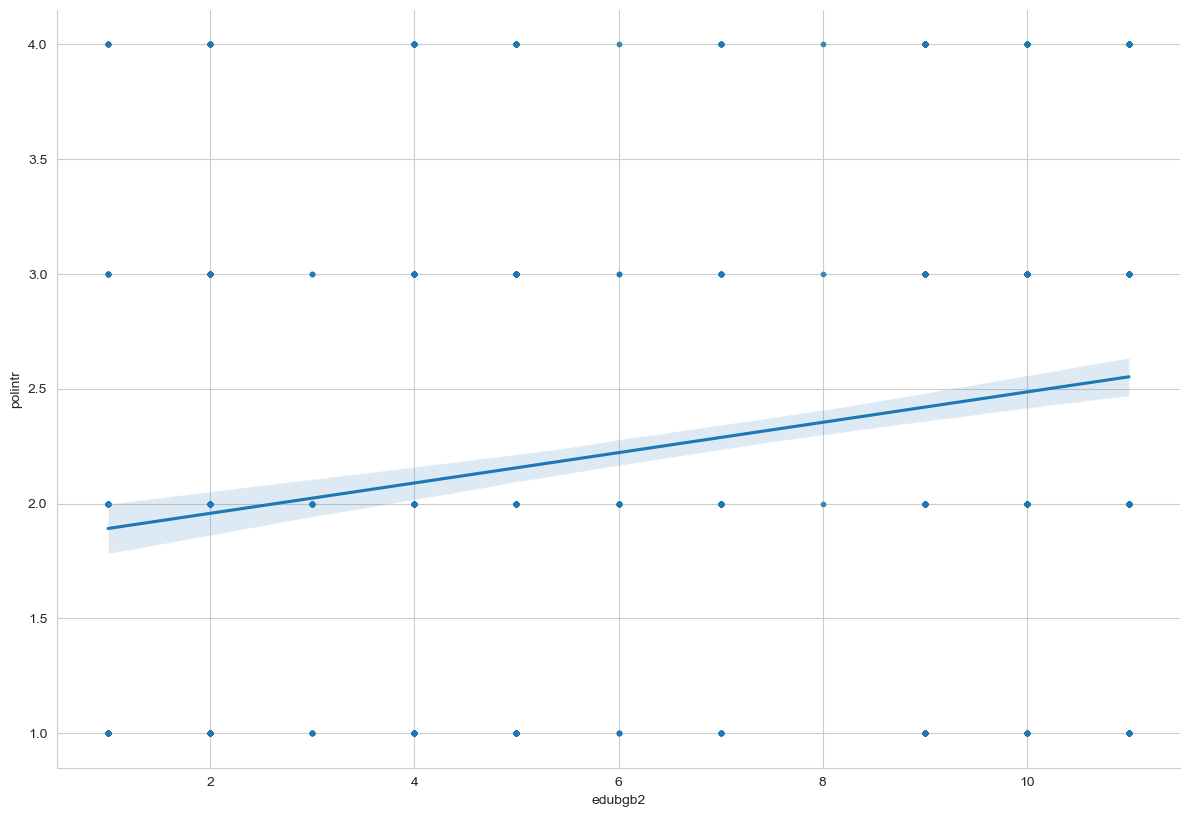

In [51]:
sns.lmplot(df_edugb_polintr, x = 'edubgb2', y = 'polintr',
           height=8.27, aspect=12/8.27, 
          scatter_kws={"s": 10})

### A high use of internet causes a high trust in politicians

In [52]:
### ppltrst
replace_with_na = [7, 8, 9]
df['netusoft'].replace(replace_with_na, np.nan, inplace = True)

C:\Users\19241\AppData\Local\Temp\ipykernel_32304\2239331634.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['netusoft'].replace(replace_with_na, np.nan, inplace = True)


In [53]:
replace_with_na = [77, 88, 99]
df['trstplt'].replace(replace_with_na, np.nan, inplace = True)

C:\Users\19241\AppData\Local\Temp\ipykernel_32304\1383203637.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['trstplt'].replace(replace_with_na, np.nan, inplace = True)


In [54]:
df_netuse_trst = df[['netusoft', 'trstplt']].dropna()

In [55]:
pearsonr(df_netuse_trst['netusoft'], df_netuse_trst['trstplt'])

PearsonRResult(statistic=0.026599501241976433, pvalue=0.36831220555054656)

(3.0, 3.6)

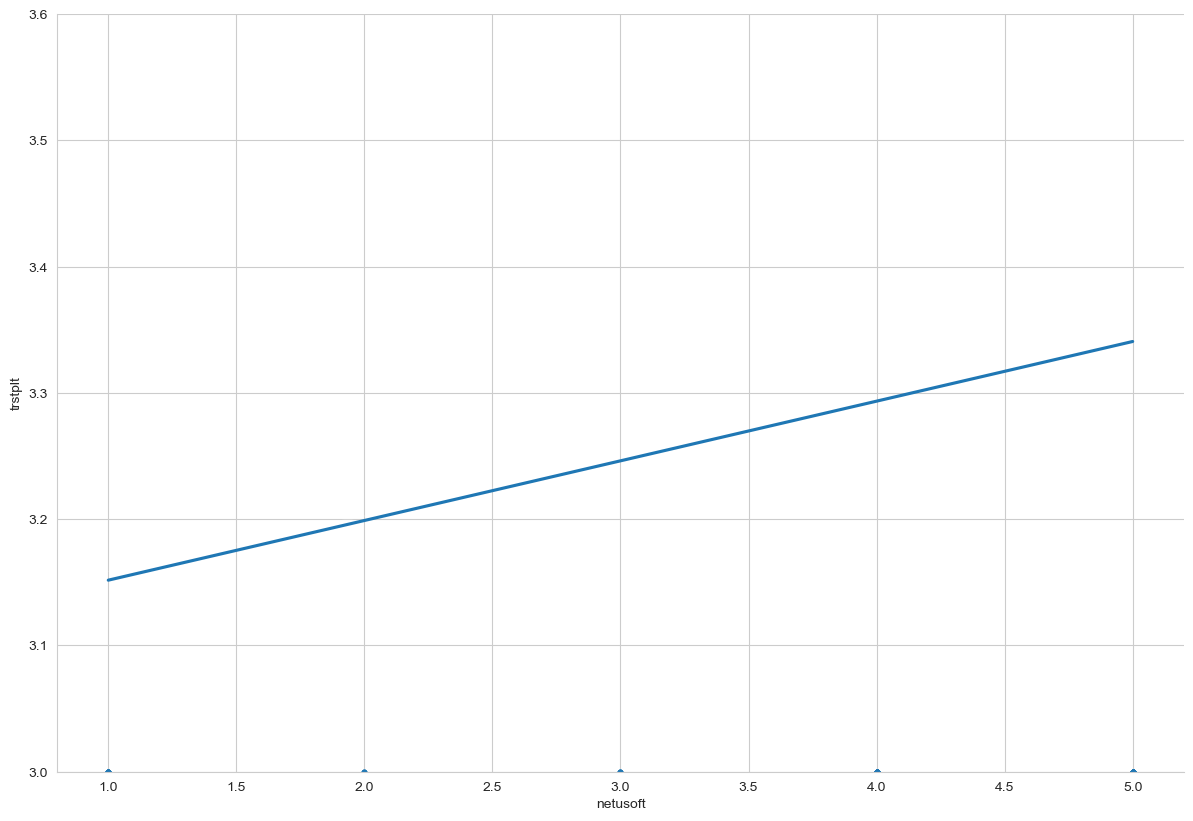

In [56]:
sns.lmplot(df_netuse_trst, x = 'netusoft', y = 'trstplt',
           height=8.27, aspect=12/8.27, 
          scatter_kws={"s": 10}, ci = 0)
plt.ylim(3, 3.6)

## References

European Commission, Brussels (2018). Flash Eurobarometer 464 (Fake News and Disinformation Online). GESIS Data Archive, Cologne. ZA6934 Data file Version 1.0.0, https://doi.org/10.4232/1.13019.

Graham, J., Haidt, J., Koleva, S., Motyl, M., Iyer, R., Wojcik, S.P.,& Ditto, P.H. (2013). Chapter Two - Moral Foundations Theory: The Pragmatic Validity of Moral Pluralism. In P. Devine, & A. Plant (Eds.), *Advances in Experimental Social Psychology* (pp. 55-130). Academic Press. https://doi.org/10.1016/B978-0-12-407236-7.00002-4.